# Data Augmentation To Address Overfitting In Flower Classification CNN
In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations



In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('Flower_photos', origin = dataset_url, cache_dir = '.', untar = True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228818944/228813984 [==============================] - 16s 0us/step


In [4]:
data_dir

'.\\datasets\\Flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/Flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/Flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/Flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/Flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/Flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/Flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [11]:
print(image_count)

3670


In [12]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/Flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/Flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/Flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/Flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/Flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

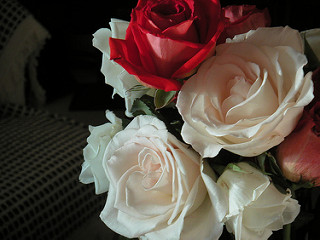

In [13]:
PIL.Image.open(str(roses[1]))

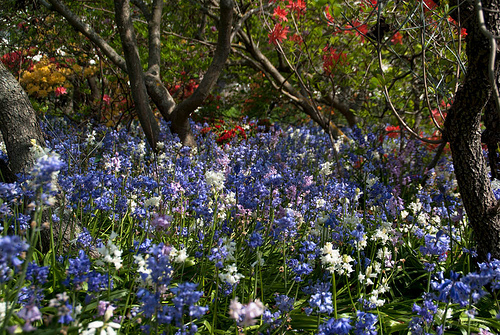

In [15]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

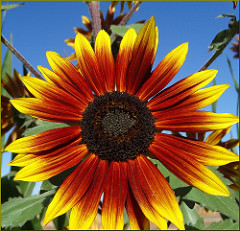

In [17]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[3]))

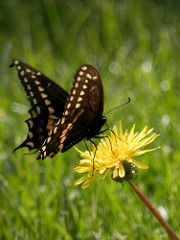

In [18]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[5]))

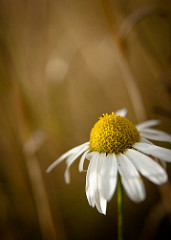

In [20]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[8]))

In [21]:
flowers_images_dict = {
    'roses': roses,
    'tulips': tulips,
    'sunflowers':sunflowers,
    'daisy': daisy,
    'dandelion': dandelion
}

In [22]:
flowers_labels_dict = {
    'roses': 0,
    'tulips': 1,
    'sunflowers': 2,
    'daisy': 3,
    'dandelion': 4
}

In [23]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/Flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/Flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/Flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/Flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/Flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [25]:
str(flowers_images_dict['roses'][0])

'datasets\\Flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [27]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [28]:
img.shape

(240, 179, 3)

In [29]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [32]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [33]:
X = np.array(X)
y = np.array(y)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [35]:
x_train = x_train/255
x_test = x_test/255

In [48]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=30)  

Epoch 1/30
92/92 [==============================] - 67s 727ms/step - loss: 1.4097 - accuracy: 0.4057
Epoch 2/30
92/92 [==============================] - 66s 718ms/step - loss: 0.9888 - accuracy: 0.6189
Epoch 3/30
92/92 [==============================] - 65s 703ms/step - loss: 0.7976 - accuracy: 0.6918
Epoch 4/30
92/92 [==============================] - 65s 708ms/step - loss: 0.5649 - accuracy: 0.7909
Epoch 5/30
92/92 [==============================] - 65s 706ms/step - loss: 0.3899 - accuracy: 0.8614
Epoch 6/30
92/92 [==============================] - 63s 683ms/step - loss: 0.2282 - accuracy: 0.9288
Epoch 7/30
92/92 [==============================] - 65s 709ms/step - loss: 0.1151 - accuracy: 0.9670
Epoch 8/30
92/92 [==============================] - 64s 692ms/step - loss: 0.0771 - accuracy: 0.9772
Epoch 9/30
92/92 [==============================] - 66s 715ms/step - loss: 0.0450 - accuracy: 0.9881
Epoch 10/30
92/92 [==============================] - 66s 718ms/step - loss: 0.0709 - accura

In [50]:
model.evaluate(x_test, y_test)

23/23 [==============================] - 5s 197ms/step - loss: 2.4296 - accuracy: 0.6349


[2.429569721221924, 0.6348773837089539]

# Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [51]:
predictions = model.predict(x_test)
predictions

array([[  3.2258997,  -4.0487204, -26.392597 ,  -3.0201616,  18.927794 ],
       [  7.7816663,   3.7345288, -11.630918 ,  -4.722938 ,  -5.900402 ],
       [  8.7949915,  19.51793  , -19.422438 ,  -0.5745286, -14.295541 ],
       ...,
       [ -1.936981 ,  -1.0461653,   9.24863  ,  -4.720603 ,  -5.693693 ],
       [ -1.7487904,  -3.8372371, -11.722698 ,  -1.8056942,  16.724424 ],
       [  1.9375429,   3.3650432,  -7.8631935,   2.436213 ,  -0.4049294]],
      dtype=float32)

In [58]:
score = tf.nn.softmax(predictions[2])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.2033211e-05, 9.9997795e-01, 1.2257536e-17, 1.8790887e-09,
       2.0653204e-15], dtype=float32)>

In [59]:
np.argmax(score)

1

In [60]:
y_test[2]

1

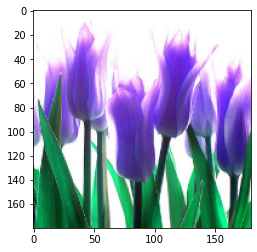

In [61]:
plt.imshow(x_test[2])

In [62]:
y_test[0]

4

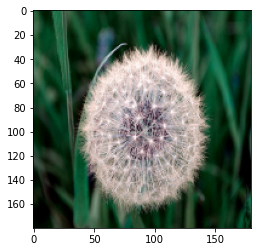

In [63]:
plt.imshow(x_test[0])

In [64]:
## Improve Test Accuracy Using Data Augmentation

In [72]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

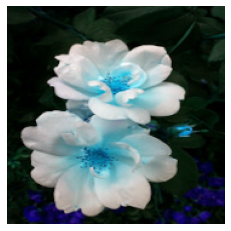

In [73]:
plt.axis('off')
plt.imshow(X[0])

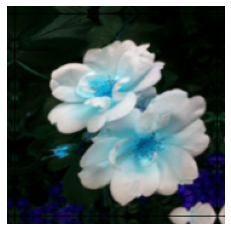

In [75]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

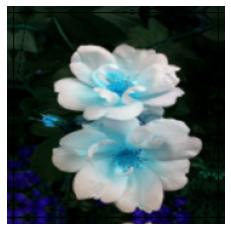

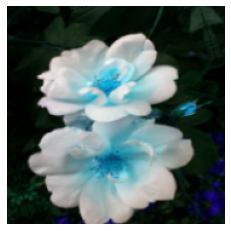

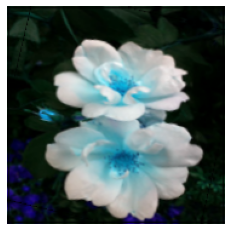

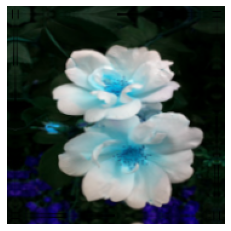

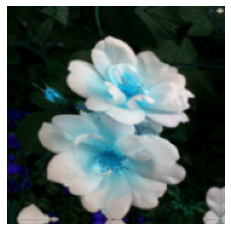

In [78]:
for i in range(5):
    plt.figure()
    plt.axis('off')
    plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [83]:
numm_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D()
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D()
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D()
    layers.Dropout(0.2),
    layers.Dense(128, activation = 'relu')
    layers.Dense(numm_classes)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = (['accuracy']))

model.fit(x_train, y_train, epochs=10)

SyntaxError: invalid syntax (<ipython-input-83-8d7529991df2>, line 7)

In [92]:
numm_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(numm_classes)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 83s 907ms/step - loss: 1.3163 - accuracy: 0.4309
Epoch 2/10
92/92 [==============================] - 84s 914ms/step - loss: 1.0381 - accuracy: 0.5913
Epoch 3/10
92/92 [==============================] - 80s 871ms/step - loss: 0.9525 - accuracy: 0.6185
Epoch 4/10
92/92 [==============================] - 74s 804ms/step - loss: 0.8742 - accuracy: 0.6611
Epoch 5/10
92/92 [==============================] - 74s 804ms/step - loss: 0.8118 - accuracy: 0.6870
Epoch 6/10
92/92 [==============================] - 75s 817ms/step - loss: 0.7613 - accuracy: 0.7119
Epoch 7/10
92/92 [==============================] - 74s 804ms/step - loss: 0.7227 - accuracy: 0.7224
Epoch 8/10
92/92 [==============================] - 73s 790ms/step - loss: 0.6899 - accuracy: 0.7350
Epoch 9/10
92/92 [==============================] - 74s 803ms/step - loss: 0.6495 - accuracy: 0.7452
Epoch 10/10
92/92 [==============================] - 18348s 199s/step - loss: 0.6314 - accu

In [93]:
model.evaluate(x_test, y_test)

23/23 [==============================] - 4s 170ms/step - loss: 0.7679 - accuracy: 0.7044


[0.7678759098052979, 0.7043596506118774]